<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='15'><b> Machine Learning - Model Interpretation </b></font> <br>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'></h4>

---

## <font color='#FC7307'>  LAB - Telecom Customer Churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
%matplotlib inline

pd.set_option('display.max_columns', 100)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
_ = urllib.request.urlretrieve('https://s3.amazonaws.com/weclouddata/datasets/telecom/churn/watson_telecom_churn/Watson_Telco_Customer_Churn_Outlier.csv', 'churn.csv')

In [3]:
churn = pd.read_csv('./churn.csv')
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1 Data Exploration

In [4]:
churn.shape

(7043, 21)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

> <font color='#8a2be2	'> Note: column TotalCharge is read as a string. Needs to convert it to numeric

In [6]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

#### 1.1 Exploring Target Column

In [7]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

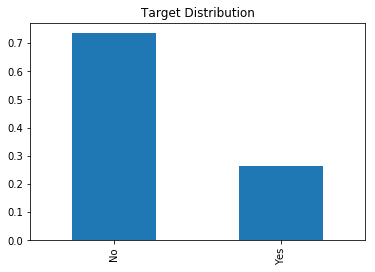

In [8]:
(churn['Churn'].value_counts()/churn.Churn.size).plot(kind='bar', title='Target Distribution', figsize=(6,4))

In [9]:
churn['Churn']=churn.Churn.map({'No':0, 'Yes':1})

#### 4.1.2 Exploring Numeric Features

In [10]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,66.479661,2283.300441,0.265370
std,0.368612,24.559481,84.707274,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.525000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.900000,3794.737500,1.000000
max,1.000000,72.000000,5590.250000,8684.800000,1.000000


> `TotalCharges` column has missing values

In [11]:
## Check missing values
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> <font color='#8a2be2'> Column TotalCharges requires missing imputation

In [12]:
churn.TotalCharges = churn.TotalCharges.fillna(0)

In [13]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,66.479661,2279.734304,0.265370
std,0.368612,24.559481,84.707274,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.525000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.900000,3786.600000,1.000000
max,1.000000,72.000000,5590.250000,8684.800000,1.000000


In [14]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

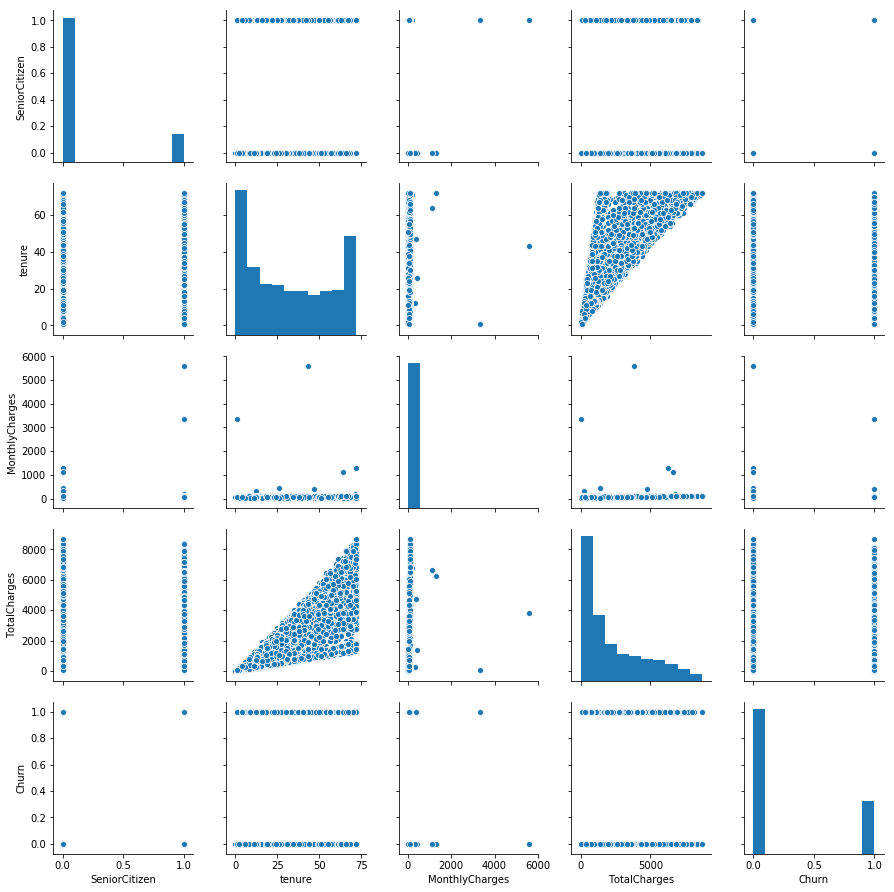

In [15]:
sns.pairplot(churn)

> <font color='#8a2be2'> There seems to be some outliers. Let's do the boxplot

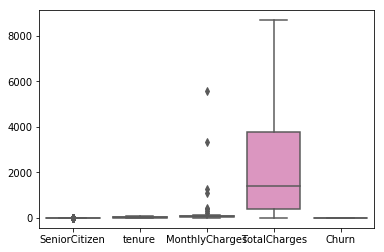

In [16]:
#sns.set(rc={'figure.figsize':(10, 8)})
#sns.set_style("whitegrid", {'axes.grid' : False})

#plt.suptitle('Boxplot', fontsize=20)

_ = sns.boxplot(data=churn, 
                orient="v", 
                palette="Set2")

> - <font color='#8a2be2'> May need to apply feature scaling for logistic regression or clustering analysis
> - <font color='#8a2be2'> MonthLyCharges column has outliers

In [17]:
numeric_cols = churn.select_dtypes(exclude=['object']).columns.values
print("Number of numeric features: {}".format(numeric_cols.size))

Number of numeric features: 5


In [18]:
for idx, col in enumerate(numeric_cols):
    print(idx, col)

0 SeniorCitizen
1 tenure
2 MonthlyCharges
3 TotalCharges
4 Churn


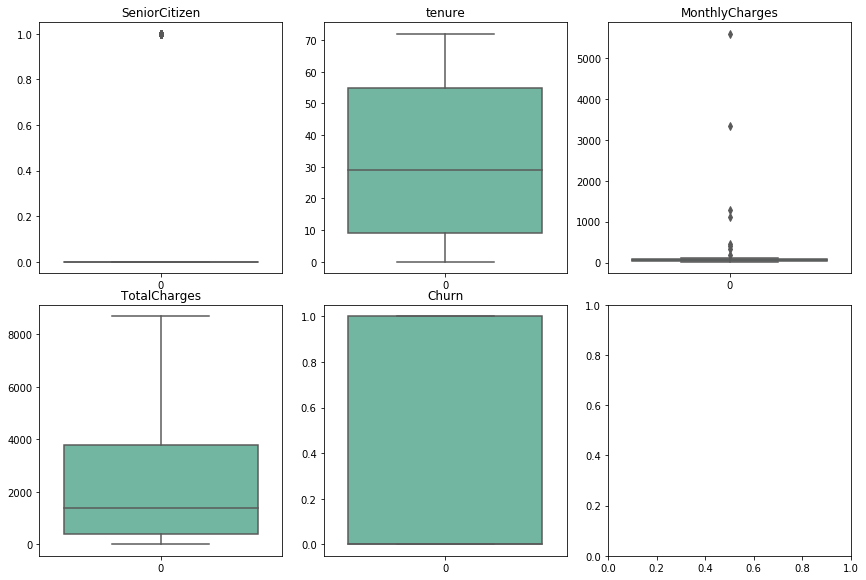

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))
fig.tight_layout()
for idx, col in enumerate(numeric_cols):
    ax_row = idx // 3
    ax_col = idx % 3
    sns.boxplot(data=churn[col], orient="v", palette="Set2", ax=axes[ax_row][ax_col]).set_title(col)

#### 4.1.3 Exploring Categorical Features


In [20]:
# select categorical features
cat_cols = churn.iloc[:,1:].select_dtypes(include=['object']).columns.values
print("Number of category features: {}".format(cat_cols.size))

Number of category features: 15


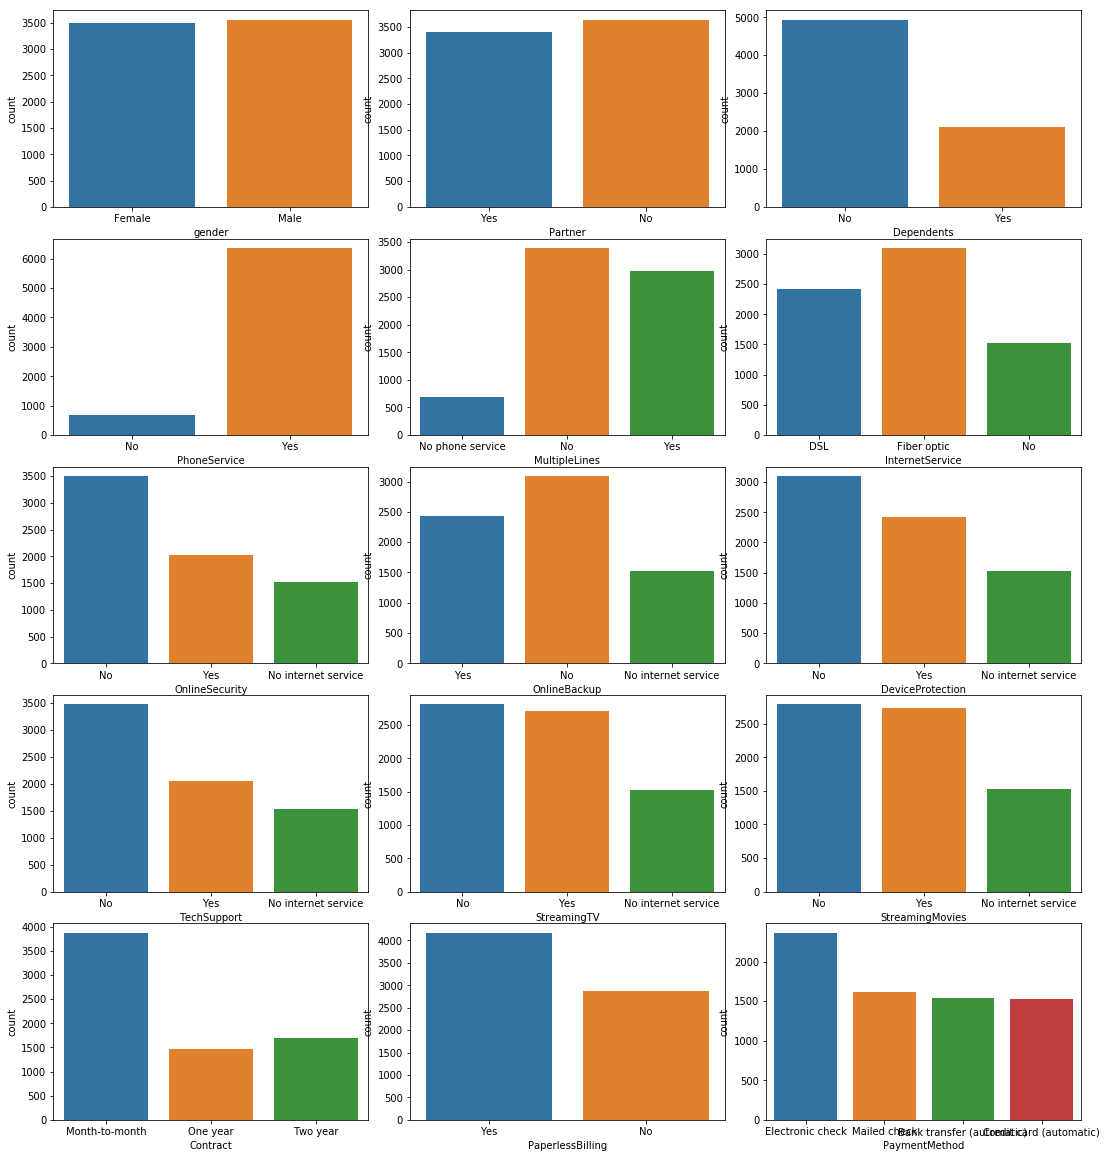

In [21]:
# check categorical feature distribution
fig, axes = plt.subplots(5, 3, figsize=(15,16))
fig.tight_layout()

for idx, col in enumerate(cat_cols):
    ax_row = idx // 3
    ax_col = idx % 3
    sns.countplot(x=col, data=churn, ax=axes[ax_row][ax_col])

> - <font color='#8a2be2'> No high cardinality features.  
> - <font color='#8a2be2'> One hot encoding required

In [22]:
for idx, col in enumerate(cat_cols):
    print (idx, col)

0 gender
1 Partner
2 Dependents
3 PhoneService
4 MultipleLines
5 InternetService
6 OnlineSecurity
7 OnlineBackup
8 DeviceProtection
9 TechSupport
10 StreamingTV
11 StreamingMovies
12 Contract
13 PaperlessBilling
14 PaymentMethod


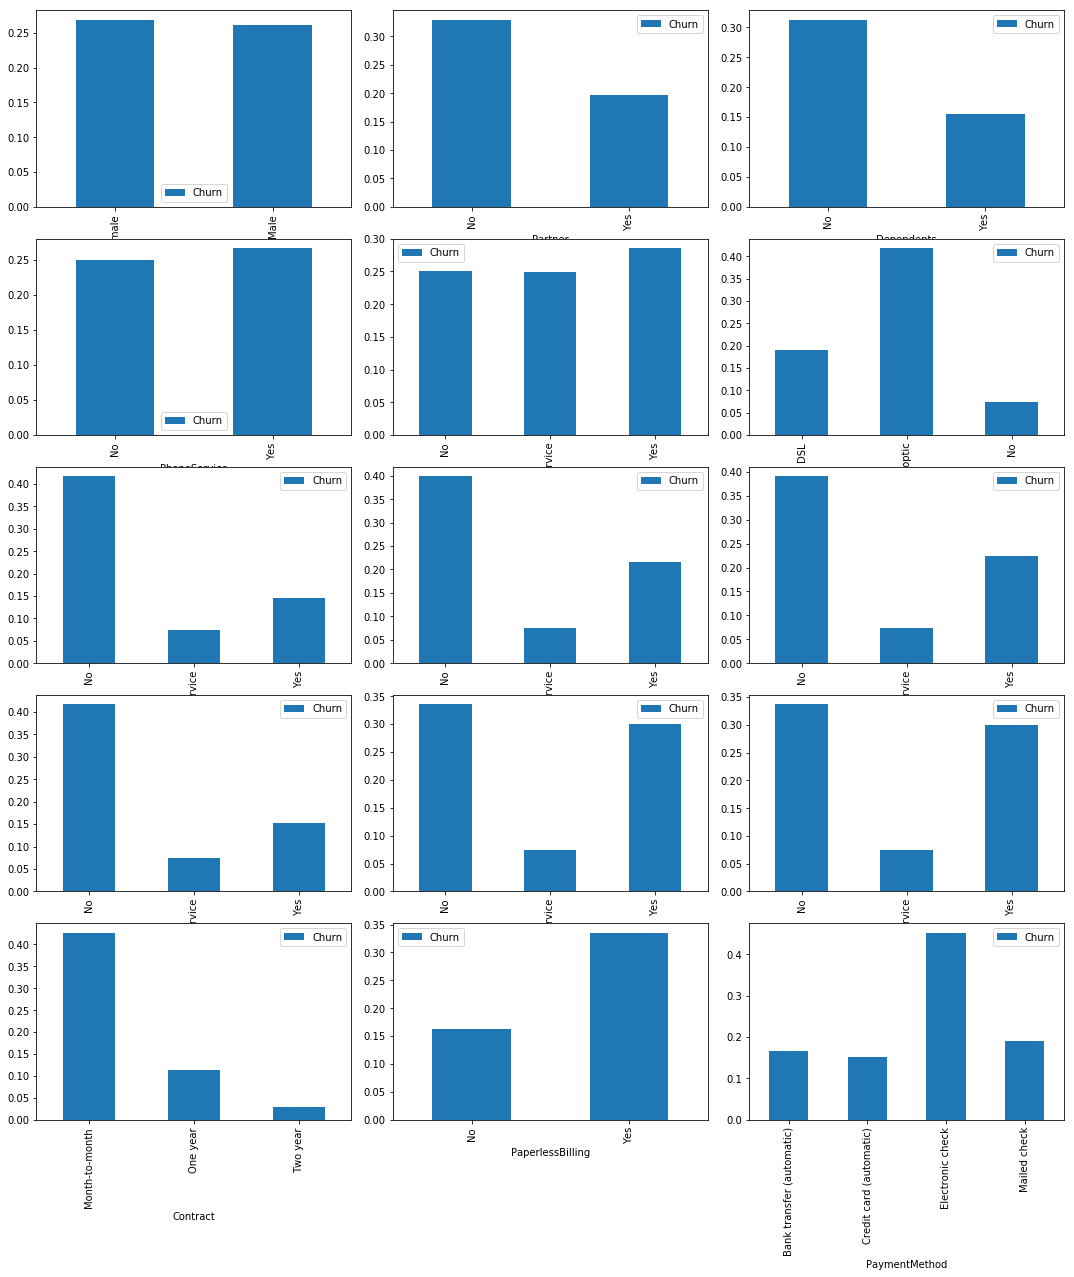

In [23]:
# check categorical feature univariaate association with churn label
fig, axes = plt.subplots(5, 3, figsize=(15,16))
fig.tight_layout()

for idx, col in enumerate(cat_cols):
    ax_row = idx // 3
    ax_col = idx % 3
    churn[[col, "Churn"]].groupby(col).mean().plot(kind='bar', ax=axes[ax_row][ax_col])


### 4.2 Feature Engineering

In [24]:
X = churn.iloc[:, :-1]
y = churn.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=2018)

X_train.drop(columns='customerID')
X_test.drop(columns='customerID')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5794,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.75,7932.50
1416,Female,0,Yes,Yes,58,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),55.50,3166.90
6516,Male,0,No,Yes,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,48.95,48.95
4845,Male,0,Yes,Yes,20,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),39.40,825.40
5124,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,486.05
3648,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,Yes,Electronic check,90.15,4554.85
5304,Male,1,Yes,No,13,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.45,849.10
857,Male,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,50.80,50.80
4087,Female,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.90,247.00
843,Female,0,No,No,13,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),30.85,394.10


In [25]:
print(X.shape, y.shape)

(7043, 20) (7043, 1)


In [26]:
print(X_train.shape, y_train.shape)

(4930, 20) (4930, 1)


In [27]:
print(X_test.shape, y_test.shape)

(2113, 20) (2113, 1)


#### 4.2.1 Outliers

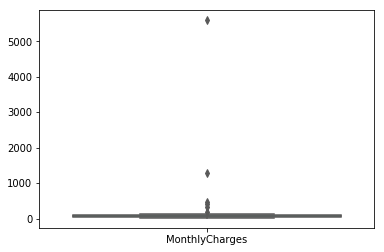

In [28]:
sns.boxplot(data=X_train[['MonthlyCharges']], orient="v", palette="Set2")

Text(0, 0.5, 'Number of Customers')

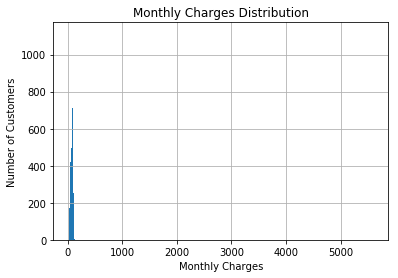

In [29]:
# Plot the distribution
fig = X_train.MonthlyCharges.hist(bins=500)
fig.set_title('Monthly Charges Distribution')
fig.set_xlabel('Monthly Charges')
fig.set_ylabel('Number of Customers')

In [30]:
IQR = X_train.MonthlyCharges.quantile(0.75) - X_train.MonthlyCharges.quantile(0.25)
Upper_fence = X_train.MonthlyCharges.quantile(0.75) + (IQR)
Upper_fence

143.58749999999998

In [31]:
print('total rows in training: {}'.format(X_train.shape[0]))
print('customers who had monthly charges higher than 251.325: {}'.format(X_train[X_train.MonthlyCharges>Upper_fence].shape[0]))
print('percentage of outliers: {}'.format(X_train[X_train.MonthlyCharges>Upper_fence].shape[0]/np.float(X_train.shape[0])))


total rows in training: 4930
customers who had monthly charges higher than 251.325: 6
percentage of outliers: 0.0012170385395537525


<font size='3'> <bold> $\delta$ Applying `capping` to both train and test</bold></font>

In [32]:
X_train[['MonthlyCharges']].describe()

,MonthlyCharges
count,4930.000000
mean,66.344402
std,86.398300
min,18.250000
25%,36.112500
50%,70.250000
75%,89.850000
max,5590.250000


In [33]:
# Capping
X_train.loc[X_train['MonthlyCharges'] > Upper_fence, 'MonthlyCharges'] = Upper_fence
X_test.loc[X_test['MonthlyCharges'] > Upper_fence, 'MonthlyCharges'] = Upper_fence
print(X_train.MonthlyCharges.max())
print(X_test.MonthlyCharges.max())

143.58749999999998
143.58749999999998


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
X_train[['MonthlyCharges']].describe()

,MonthlyCharges
count,4930.000000
mean,64.845837
std,30.103423
min,18.250000
25%,36.112500
50%,70.250000
75%,89.850000
max,143.587500


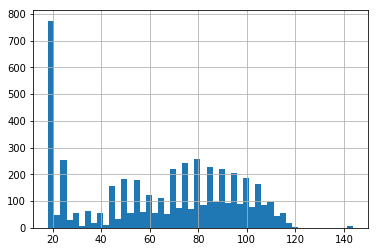

In [35]:
_ = X_train.MonthlyCharges.hist(bins=50)

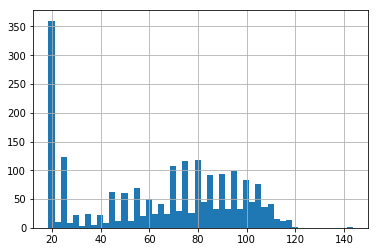

In [36]:
_ = X_test.MonthlyCharges.hist(bins=50)

> - <font color='#8a2be2'> Outliers got capped

#### 4.2.2 Feature Transformataion

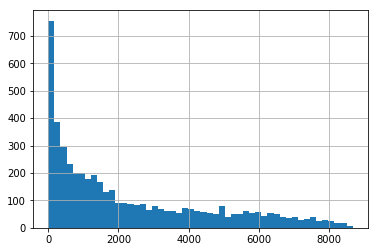

In [37]:
_ = X_train.TotalCharges.hist(bins=50)

<font size='3'> <bold> $\delta$ Column TotalCharges is pretty skewed. </bold></font>
> Let's apply log transformataion on it

In [38]:
# log transformation
X_train['TotalCharges_log'] = np.log((1 + X_train['TotalCharges']))
X_test['TotalCharges_log'] = np.log((1 + X_test['TotalCharges']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


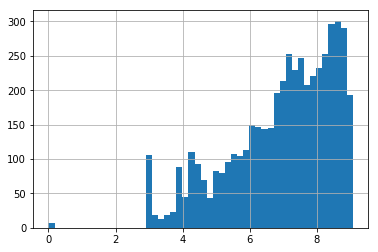

In [39]:
_ = X_train.TotalCharges_log.hist(bins=50)

> - <font color='#8a2be2'> Log transformation is monotonic, so tree models don't get affected
> - <font color='#8a2be2'> In this case, log transform doesn't look very good. 


In [40]:
# let's try sqrt transformation
X_train['TotalCharges_sqrt'] = np.sqrt((1 + X_train['TotalCharges']))
X_test['TotalCharges_sqrt'] = np.sqrt((1 + X_test['TotalCharges']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


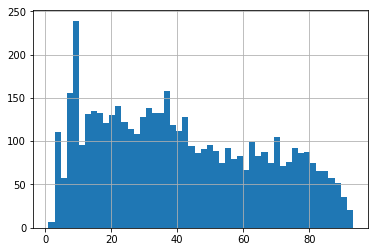

In [41]:
_ = X_train.TotalCharges_sqrt.hist(bins=50)

In [42]:
X_train.drop(columns=['TotalCharges', 'TotalCharges_log'], inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges_sqrt
4530,1945-XISKS,Female,0,Yes,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,36.554070
5787,6711-VTNRE,Female,0,No,No,36,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,87.55,55.489639
1946,7449-HVPIV,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.40,71.415334
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,81.229613
5243,7661-CPURM,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),87.70,41.556588


In [44]:
X_test.drop(columns=['TotalCharges', 'TotalCharges_log'], inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### 4.2.3 Feature Encoding - Binning

In [45]:
# calculate quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = X_train['MonthlyCharges'].quantile(quantile_list)
quantiles

0.00     18.2500
0.25     36.1125
0.50     70.2500
0.75     89.8500
1.00    143.5875
Name: MonthlyCharges, dtype: float64

In [46]:
# quantile cut
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
X_train['MonthlyCharges_Qntl'] = pd.qcut(X_train['MonthlyCharges'], 
                                         q=quantile_list,       
                                         labels=quantile_labels)

X_train.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges_sqrt,MonthlyCharges_Qntl
4530,1945-XISKS,Female,0,Yes,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,36.554070,0-25Q
5787,6711-VTNRE,Female,0,No,No,36,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,87.55,55.489639,50-75Q
1946,7449-HVPIV,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.40,71.415334,75-100Q
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,81.229613,75-100Q
5243,7661-CPURM,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),87.70,41.556588,50-75Q


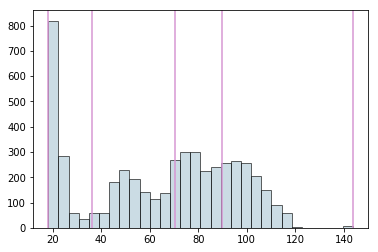

In [47]:
fig, ax = plt.subplots()
X_train['MonthlyCharges'].hist(bins=30, 
                             color='#A9C5D3', 
                             edgecolor='black', 
                             grid=False,
                             alpha=0.6)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='#D696D3')
    

In [48]:
# apply binning to test data
X_test['MonthlyCharges_Qntl'] = pd.qcut(X_test['MonthlyCharges'], 
                                         q=quantile_list,       
                                         labels=quantile_labels)

X_test.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges_sqrt,MonthlyCharges_Qntl
5794,1162-ECVII,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.75,89.070197,75-100Q
1416,4859-ZSRDZ,Female,0,Yes,Yes,58,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),55.50,56.284101,25-50Q
6516,6876-ADESB,Male,0,No,Yes,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,48.95,7.067531,25-50Q
4845,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),39.40,28.747174,25-50Q
5124,7267-FRMJW,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,22.069209,0-25Q


In [49]:
X_train.drop(columns=['MonthlyCharges'], inplace=True)
X_test.drop(columns=['MonthlyCharges'], inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### 4.2.4 Feature Encoding - One Hot Encoding

In [50]:
# Label Encoding for one feature
le = LabelEncoder()
monthlycharges_bin = X_train[['MonthlyCharges_Qntl']]
monthlycharges_bin['MonthlyCharges_Qntl_le'] = monthlycharges_bin.apply(le.fit_transform).values

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
monthlycharges_bin.head()

,MonthlyCharges_Qntl,MonthlyCharges_Qntl_le
4530,0-25Q,0
5787,50-75Q,2
1946,75-100Q,3
490,75-100Q,3
5243,50-75Q,2


In [52]:
# ohe.fit_transform(monthlycharges_bin[['MonthlyCharges_Qntl_le']])

In [53]:
#monthlycharges_bin_ohe

In [54]:
# One hot encoding for one feature
ohe = OneHotEncoder()
monthlycharges_bin.reset_index(inplace=True)
monthlycharges_bin_ohe = ohe.fit_transform(monthlycharges_bin[['MonthlyCharges_Qntl_le']]).toarray()
le_labels = list(le.classes_)
monthlycharges_bin_df_ohe = pd.DataFrame(monthlycharges_bin_ohe, columns=le_labels)
pd.concat([monthlycharges_bin, monthlycharges_bin_df_ohe], axis=1).head(10)

,index,MonthlyCharges_Qntl,MonthlyCharges_Qntl_le,0-25Q,25-50Q,50-75Q,75-100Q
0,4530,0-25Q,0,1.0,0.0,0.0,0.0
1,5787,50-75Q,2,0.0,0.0,1.0,0.0
2,1946,75-100Q,3,0.0,0.0,0.0,1.0
3,490,75-100Q,3,0.0,0.0,0.0,1.0
4,5243,50-75Q,2,0.0,0.0,1.0,0.0
5,1241,25-50Q,1,0.0,1.0,0.0,0.0
6,3164,75-100Q,3,0.0,0.0,0.0,1.0
7,6721,50-75Q,2,0.0,0.0,1.0,0.0
8,888,75-100Q,3,0.0,0.0,0.0,1.0
9,3375,0-25Q,0,1.0,0.0,0.0,0.0


In [55]:
X_train.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges_sqrt,MonthlyCharges_Qntl
4530,1945-XISKS,Female,0,Yes,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,36.554070,0-25Q
5787,6711-VTNRE,Female,0,No,No,36,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,55.489639,50-75Q


In [56]:
X_test.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges_sqrt,MonthlyCharges_Qntl
5794,1162-ECVII,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),89.070197,75-100Q
1416,4859-ZSRDZ,Female,0,Yes,Yes,58,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),56.284101,25-50Q


In [57]:
cat_cols = X_train.iloc[:,1:].select_dtypes(include=['object', 'category']).columns.values
cat_cols

array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges_Qntl'], dtype=object)

In [58]:
# Encoding for all categorical columns 

X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)

for col in cat_cols:
    
    le = LabelEncoder()
    # apply LabelEncoder to both train and test
    X_train[col] = X_train[[col]].apply(le.fit_transform).values
    X_test[col] = X_test[[col]].apply(le.transform).values
    le_labels = [col + '_' + label for label in list(le.classes_)]

    ohe = OneHotEncoder()
    
    # apply OHE fit transform to train
    train_ohe = ohe.fit_transform(X_train[[col]]).toarray()
    train_ohe_df = pd.DataFrame(train_ohe, columns=le_labels)
    X_train = pd.concat([X_train, train_ohe_df.iloc[:,:-1]], axis=1)
    X_train.drop(columns=col, inplace=True)
    
    # apply OHE transform to test
    test_ohe = ohe.transform(X_test[[col]]).toarray()
    test_ohe_df = pd.DataFrame(test_ohe, columns=le_labels)
    X_test = pd.concat([X_test, test_ohe_df.iloc[:,:-1]], axis=1)
    X_test.drop(columns=col, inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [59]:
X_train.shape

(4930, 34)

In [60]:
X_test.shape

(2113, 34)

In [61]:
X_train.head()

,index,customerID,SeniorCitizen,tenure,TotalCharges_sqrt,gender_Female,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges_Qntl_0-25Q,MonthlyCharges_Qntl_25-50Q,MonthlyCharges_Qntl_50-75Q
0,4530,1945-XISKS,0,67,36.554070,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5787,6711-VTNRE,0,36,55.489639,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1946,7449-HVPIV,0,55,71.415334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,490,3552-CTCYF,0,63,81.229613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5243,7661-CPURM,0,19,41.556588,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [62]:
sum(X_train.columns.values != X_test.columns.values)

0

### 4.3 Model Fitting

In [63]:
X_train.head()

,index,customerID,SeniorCitizen,tenure,TotalCharges_sqrt,gender_Female,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges_Qntl_0-25Q,MonthlyCharges_Qntl_25-50Q,MonthlyCharges_Qntl_50-75Q
0,4530,1945-XISKS,0,67,36.554070,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5787,6711-VTNRE,0,36,55.489639,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1946,7449-HVPIV,0,55,71.415334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,490,3552-CTCYF,0,63,81.229613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5243,7661-CPURM,0,19,41.556588,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
X_train.drop(columns=['customerID'], inplace=True)
X_test.drop(columns=['customerID'], inplace=True)

In [65]:
rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced_subsample', random_state=2018)
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=2018,
            verbose=0, warm_start=False)

In [66]:
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)
test_pred_proba = rfc.predict_proba(X_test)

In [67]:
print(roc_auc_score(y_test, test_pred_proba[:,1]))

0.8390767374143333


In [68]:
print(classification_report(y_test.values, test_pred))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87      1518
          1       0.70      0.49      0.58       595

avg / total       0.79      0.80      0.79      2113



In [69]:
fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, test_pred_proba[:,1])

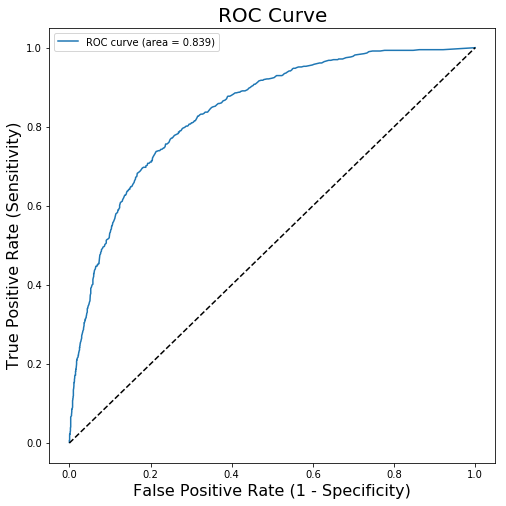

In [70]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve', size=20)
plt.legend(loc='best')

### 4.4 Model Tuning

In [71]:
rfc = RandomForestClassifier(class_weight='balanced_subsample', random_state=2018)
param_grid = { 
    'n_estimators': [200],
    'max_depth' : [4,6,8]
}

grid_rfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid, 
                    cv=5, 
                    scoring='accuracy',
                    return_train_score=True)

grid_rfc.fit(X_train, y_train.values.ravel())
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)
print(grid_rfc.best_estimator_)

0.7697768762677485
{'max_depth': 8, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=2018,
            verbose=0, warm_start=False)


In [72]:
rfc_best = grid_rfc.best_estimator_
rfc_best.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=2018,
            verbose=0, warm_start=False)

In [73]:
test_pred = rfc_best.predict(X_test)
test_pred_proba = rfc_best.predict_proba(X_test)

print(classification_report(y_test.values, test_pred))
print(roc_auc_score(y_test, test_pred_proba[:,1]))

             precision    recall  f1-score   support

          0       0.90      0.77      0.83      1518
          1       0.57      0.77      0.66       595

avg / total       0.80      0.77      0.78      2113

0.854018445322793


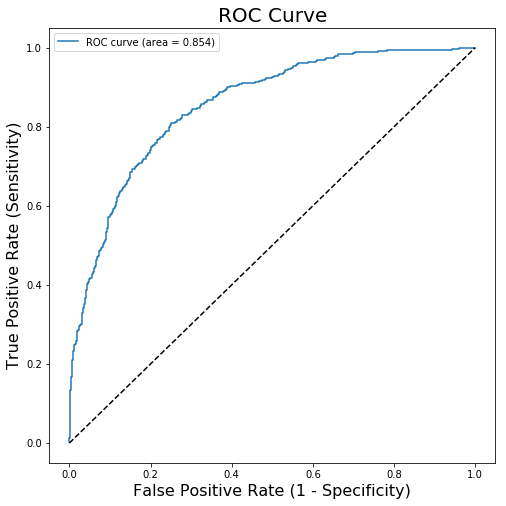

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, test_pred_proba[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve', size=20)
plt.legend(loc='best')

### 4.5 Model Interpretation

In [76]:
rfc_best.feature_importances_

array([0.05307965, 0.00903423, 0.15309877, 0.11589248, 0.00889622,
       0.01045928, 0.01166928, 0.0041398 , 0.0091159 , 0.00404678,
       0.02296407, 0.05501216, 0.06413365, 0.00396281, 0.02274263,
       0.01419175, 0.02243232, 0.0096357 , 0.05734647, 0.01008254,
       0.0085048 , 0.01244774, 0.00887845, 0.00989323, 0.17753728,
       0.02327447, 0.01785063, 0.00702679, 0.00869178, 0.04275625,
       0.00542395, 0.00895265, 0.0068255 ])

In [77]:
import lime
import lime.lime_tabular

In [78]:
feature_names = X_train.columns[1:]

In [79]:
feature_names.values

array(['SeniorCitizen', 'tenure', 'TotalCharges_sqrt', 'gender_Female',
       'Partner_No', 'Dependents_No', 'PhoneService_No',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No', 'StreamingTV_No internet service',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'Contract_Month-to-month', 'Contract_One year',
       'PaperlessBilling_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'MonthlyCharges_Qntl_0-25Q',
       'MonthlyCharges_Qntl_25-50Q', 'MonthlyCharges_Qntl_50-75Q'],
      dtype=object)

In [80]:
X_train.columns

Index(['index', 'SeniorCitizen', 'tenure', 'TotalCharges_sqrt',
       'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_One year', 'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'MonthlyCharges_Qntl_0-25Q',
       'MonthlyCharges_Qntl_25-50Q', 'MonthlyCharges_Qntl_50-75Q'],
      dtype='object')

In [81]:
#help(lime.lime_tabular.LimeTabularExplainer)

In [82]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns.values,
                                                  class_names=['0','1'])

In [83]:
# Pick the observation in the validation set for which explanation is required
observation_1 = 6

# Get the explanation for RandomForest
exp = explainer.explain_instance(X_test.iloc[observation_1, :], rfc_best.predict_proba, num_features=6)
exp.show_in_notebook(show_all=False)